### Librerías

In [449]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'

#### Funcion para mostrar imagen

In [450]:
def plot_image(img, grayscale=True):
    plt.axis('off')
    if grayscale:
        #plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

#####

(488, 500, 3)


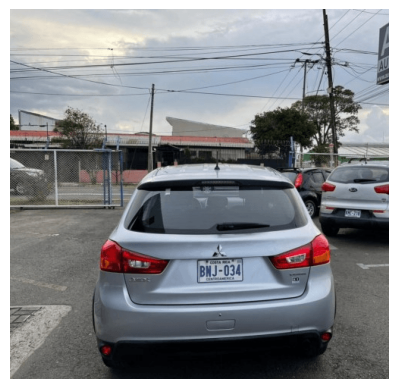

In [451]:
img = cv2.imread(f"./Dataset/002.png")
print(img.shape)
plot_image(img, False)

(488, 500)


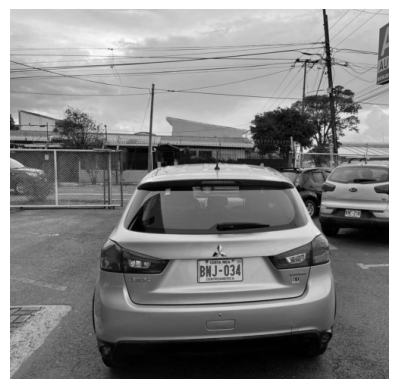

In [452]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape)
plot_image(gray, False)

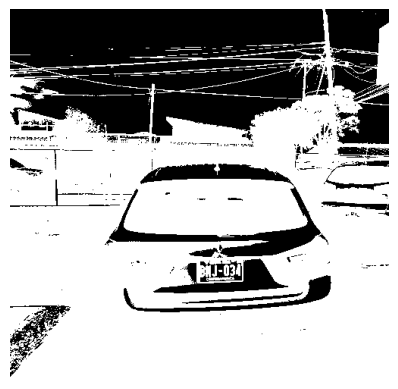

In [453]:
thresh = cv2.threshold(gray,160,255, cv2.THRESH_BINARY_INV)[1]
plot_image(thresh)

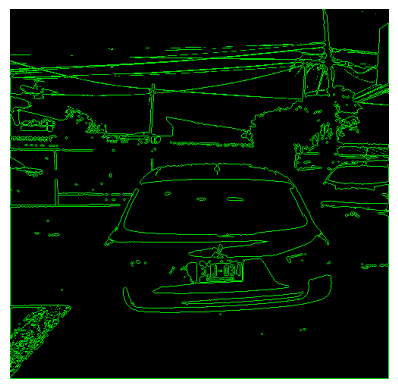

In [454]:
contornos = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
canvas = np.zeros_like(img)
cv2.drawContours(canvas, contornos, -1, (0, 255, 0), 1)
plt.axis('off')
plt.imshow(canvas)

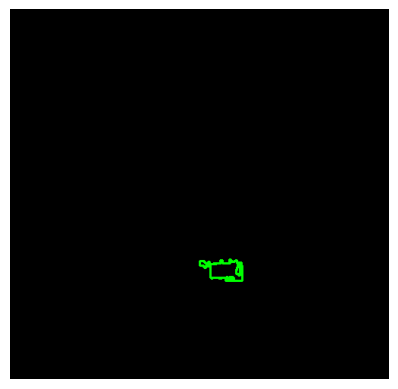

In [455]:
#La placa tica es de 300 x 150 mm --> aspect ration = 300/150 = 2
#Filtro por altura y ancho
plate_ratio = 2
min_w = 50
max_w = 90
min_h = 20
max_h = 60
candidates = []

for contour in contornos:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / float(h)
    area = cv2.contourArea(contour)
    if (np.isclose(aspect_ratio, plate_ratio, atol=0.5) and
        (max_w > w > min_w) and
        (max_h > h > min_h)):
        candidates.append(contour)

canvas = np.zeros_like(img)
cv2.drawContours(canvas, candidates, -1, (0, 255, 0), 2)
plt.axis('off')
plt.imshow(canvas)

In [456]:
#La placa tica es de 300 x 150 mm --> aspect ration = 300/150 = 2
#Filtro por area
#plate_ratio = 2
""" aspect_ratio_range = (1.5, 2.5)
min_area = 500
max_area = 2500
#min_w = 0
#max_w = 0
#min_h = 0
#max_h = 0
candidates = []

for contour in contornos:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / float(h)
    area = cv2.contourArea(contour)
    if aspect_ratio_range[0] < aspect_ratio < aspect_ratio_range[1] and min_area < area < max_area:
        candidates.append(contour)

canvas = np.zeros_like(img)
cv2.drawContours(canvas, candidates, -1, (0, 255, 0), 2)
plt.axis('off')
plt.imshow(canvas) """

" aspect_ratio_range = (1.5, 2.5)\nmin_area = 500\nmax_area = 2500\n#min_w = 0\n#max_w = 0\n#min_h = 0\n#max_h = 0\ncandidates = []\n\nfor contour in contornos:\n    x, y, w, h = cv2.boundingRect(contour)\n    aspect_ratio = w / float(h)\n    area = cv2.contourArea(contour)\n    if aspect_ratio_range[0] < aspect_ratio < aspect_ratio_range[1] and min_area < area < max_area:\n        candidates.append(contour)\n\ncanvas = np.zeros_like(img)\ncv2.drawContours(canvas, candidates, -1, (0, 255, 0), 2)\nplt.axis('off')\nplt.imshow(canvas) "

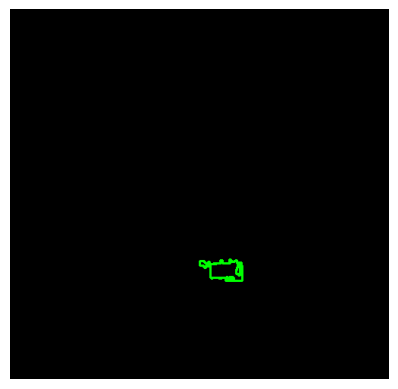

In [457]:
ys = []
for contour in candidates:
    x, y, w, h = cv2.boundingRect(contour)
    ys.append(y)

license = candidates[np.argmax(ys)]


canvas = np.zeros_like(img)
cv2.drawContours(canvas, candidates, -1, (0, 255, 0), 2)
plt.axis('off')
plt.imshow(canvas)

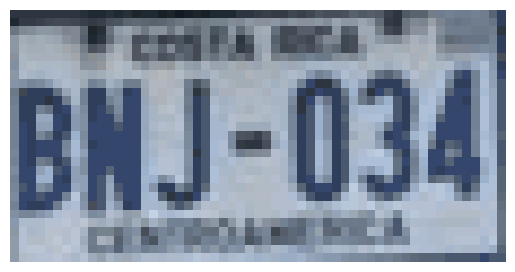

In [458]:
x, y, w, h = cv2.boundingRect(license)
cropped = img[y:y+h,x:x+w]
plot_image(cropped, False)

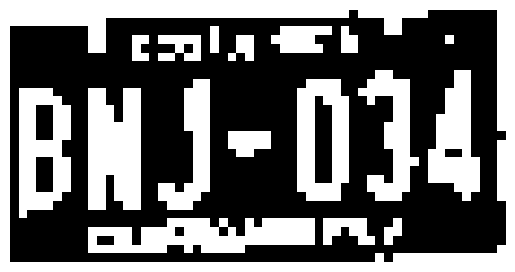

In [459]:
gray_cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
thresh_cropped = cv2.adaptiveThreshold(gray_cropped ,255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 14)
plot_image(thresh_cropped, False)

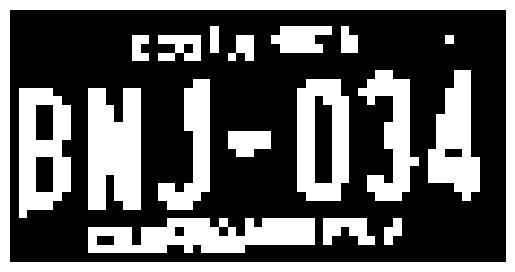

In [460]:
borderless = skimage.segmentation.clear_border(thresh_cropped)
plot_image(borderless)

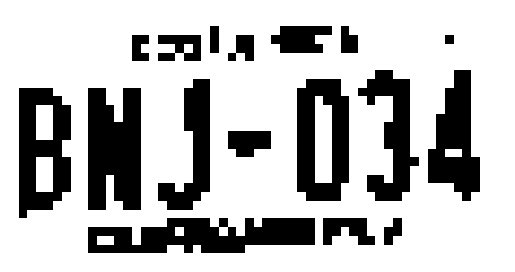

In [461]:
final = cv2.bitwise_not(borderless)
plot_image(final)

In [462]:
alphanumeric = "BCDFGHJKLMNPQRSTVWXYZ0123456789-"
options = "-c tessedit_char_whitelist={}".format(alphanumeric)
options += " --psm 7"
txt = pytesseract.image_to_string(final, config=options)
print(txt)


BNJ-034

